**Условие 1: Задача 1**  
Постройте график  
Назовите график  
Сделайте именование оси x и оси y  
Сделайте выводы  

1.1. Скачать следующие данные: kc-house-data и laptop_price  
1.2. Изучите стоимости недвижимости  
1.3. Изучите распределение квадратуры жилой площади  
1.4. Изучите распределение года постройки  

**Условие 2: 2 задача**   
2.1. Изучите распределение домов от наличия вида на набережную  
Постройте график  
Сделайте выводы  
2.2. Изучите распределение этажей домов  
2.3. Изучите распределение состояния домов  

**Условие 3: 3 задача**  
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc-house-data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1.2 Изучите распределение стоимости недвижимости

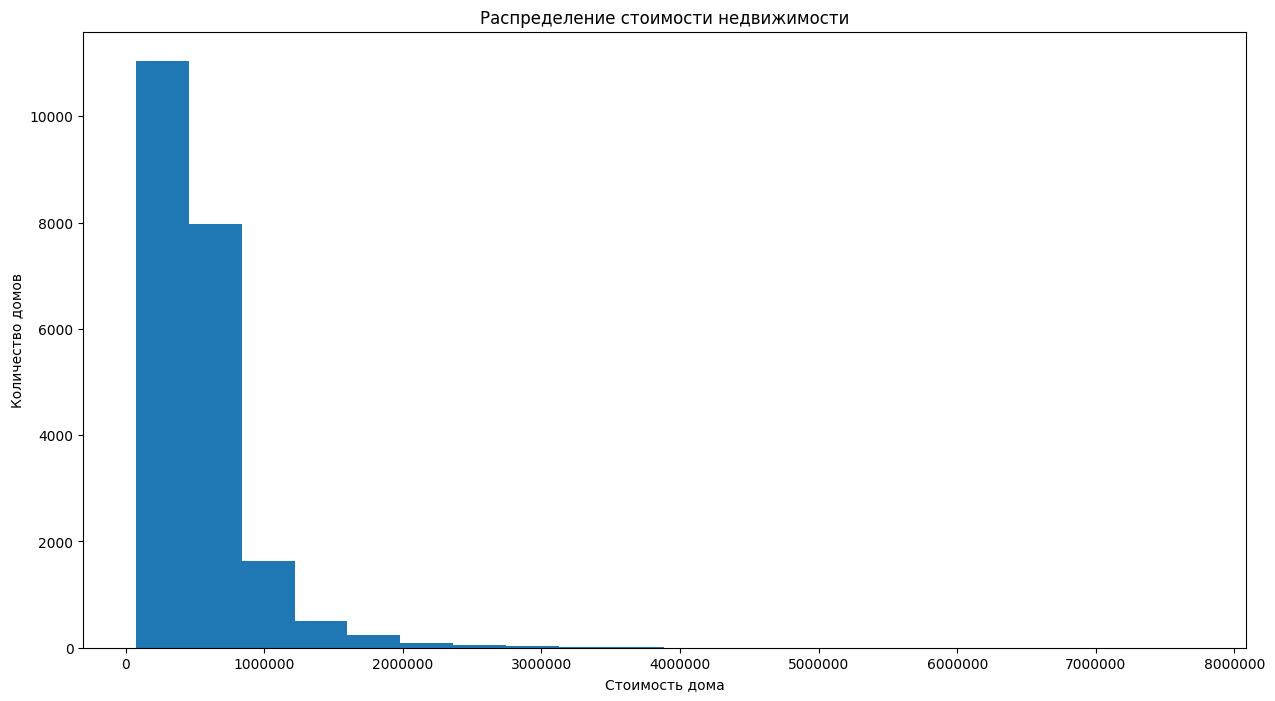

In [3]:
plt.figure(figsize=(15,8))
plt.ticklabel_format(style='plain')
plt.hist(df['price'], bins = 20)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость дома')
plt.ylabel('Количество домов');

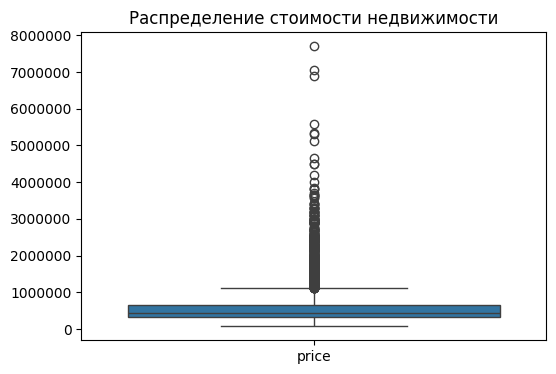

In [4]:
plt.figure(figsize=(6, 4))
plt.ticklabel_format(style='plain')
sns.boxplot(data=[df['price']])
plt.title('Распределение стоимости недвижимости');

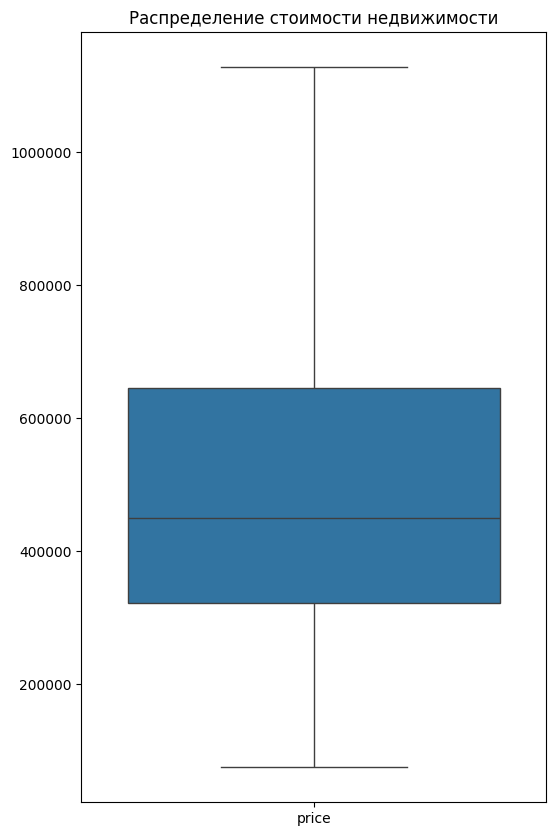

In [5]:
plt.figure(figsize=(6, 10))
plt.ticklabel_format(style='plain')
sns.boxplot(data=[df['price']], showfliers=False)
plt.title('Распределение стоимости недвижимости');

**Вывод:** средняя цена недвижимости - примерно 450000, основная доля домов имеет стоимость от 320000 до 650000, выше 1500000 уже идут выбросы цены - чем дороже цена, тем меньше домов.

1.3. Изучите распределение квадратуры жилой площади

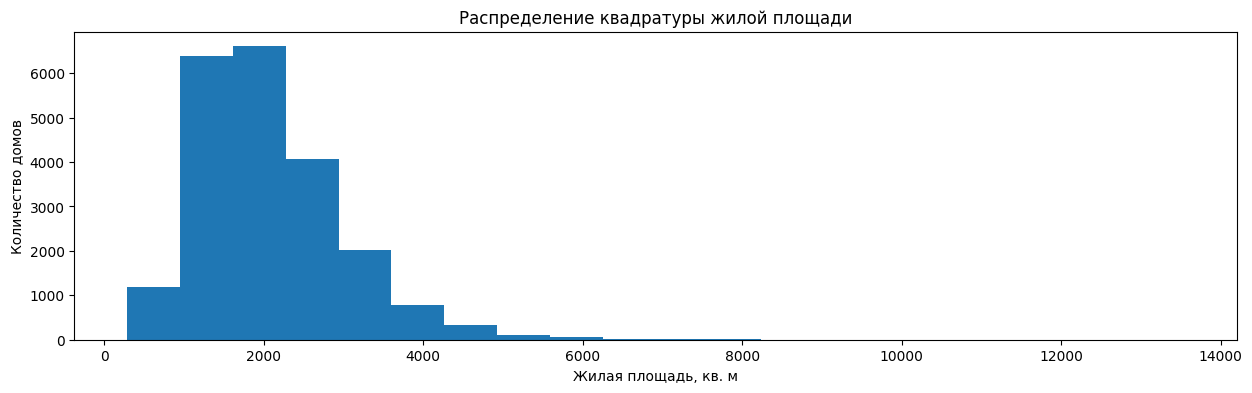

In [6]:
plt.figure(figsize=(15,4))
plt.hist(df['sqft_living'],bins = 20)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Жилая площадь, кв. м')
plt.ylabel('Количество домов');

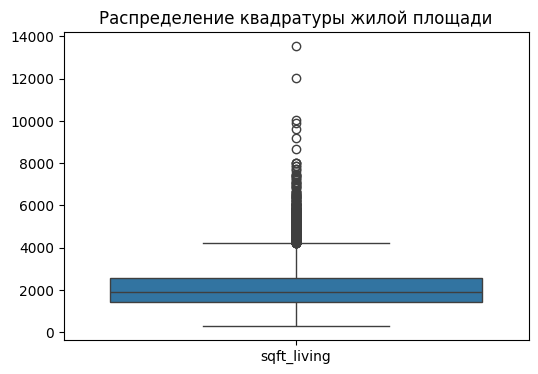

In [7]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=[df['sqft_living']])
plt.title('Распределение квадратуры жилой площади');

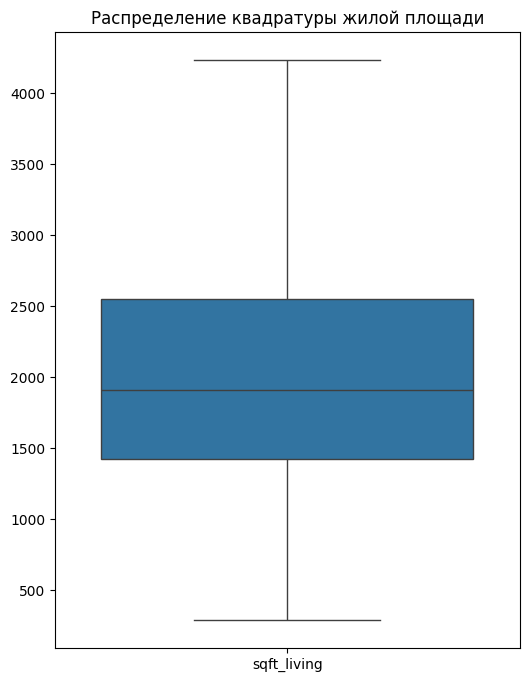

In [8]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=[df['sqft_living']], showfliers=False)
plt.title('Распределение квадратуры жилой площади');

**Вывод:** средняя квадратура жилой площади - примерно 1900 кв. м, основная доля домов имеет жилую площадь от 1400 до 2600 кв. м, выше 4250 кв. м уже идут выбросы до 14000 кв. м - чем больше квадратура, тем меньше домов.

1.4. Изучите распределение года постройки 

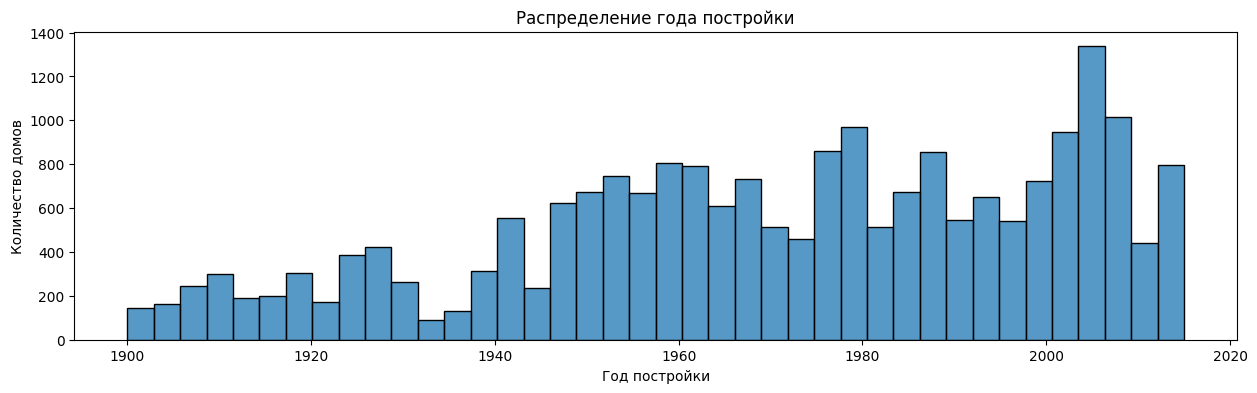

In [9]:
plt.figure(figsize=(15,4))
sns.histplot(df['yr_built'],bins = 40)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество домов');

**Вывод:** на графике виден восходящий тренд, то есть чем меньше возраст домов, тем их больше.

2.1. Изучите распределение домов от наличия вида на набережную  

In [10]:
data = df['waterfront'].value_counts()
data

waterfront
0    21450
1      163
Name: count, dtype: int64

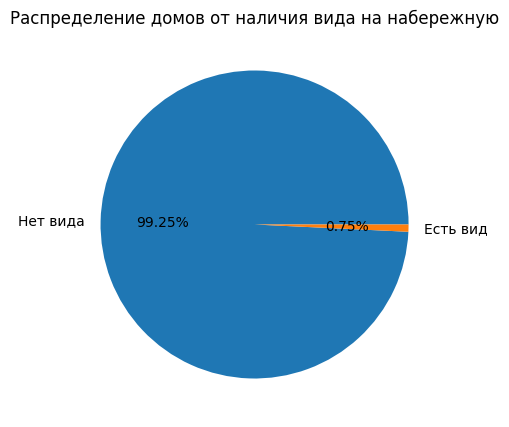

In [11]:
plt.figure(figsize=(5,5))
plt.pie(data, autopct='%1.2f%%', labels =['Нет вида', 'Есть вид'])
plt.title('Распределение домов от наличия вида на набережную');

**Вывод:** вид на набережную имеют 0,75% домов, остальные 99,25% не имеют вида на набережную (в Python значение 0 - всегда False)

2.2. Изучите распределение этажей домов

In [12]:
data1 = df['floors'].value_counts()
data1

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

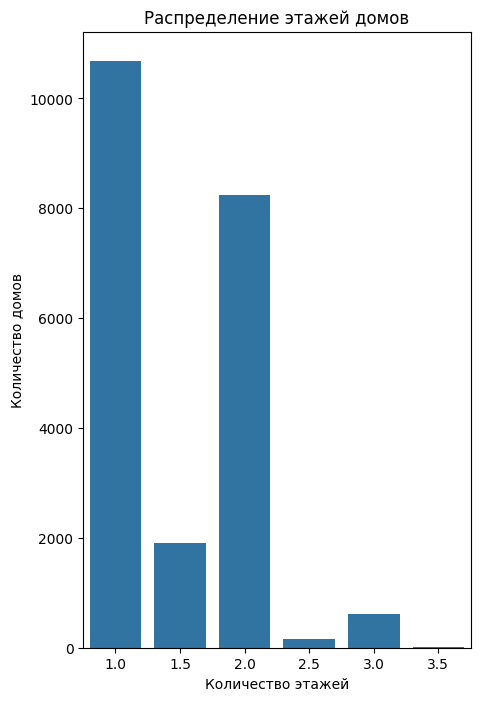

In [13]:
plt.figure(figsize=(5,8))
sns.barplot(x=data1.index,y=data1)
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

In [14]:
data2 = df['floors'].value_counts(normalize=True) 
data2

floors
1.0    0.494147
2.0    0.381298
1.5    0.088373
3.0    0.028363
2.5    0.007449
3.5    0.000370
Name: proportion, dtype: float64

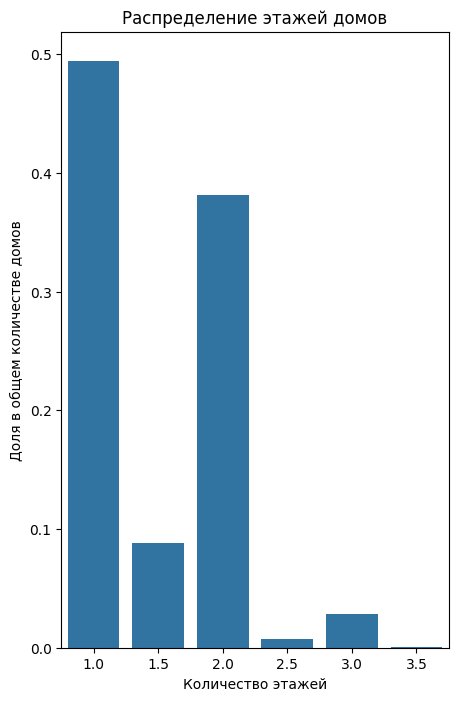

In [15]:
plt.figure(figsize=(5,8))
sns.barplot(x=data2.index,y=data2)
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('Доля в общем количестве домов');

**Вывод:** половина домов одноэтажные, 38% - 2-этажные, доли домов с другим количеством этажей значительно меньше.

2.3. Изучите распределение состояния домов  

In [16]:
data3 = df['condition'].value_counts()
data3

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

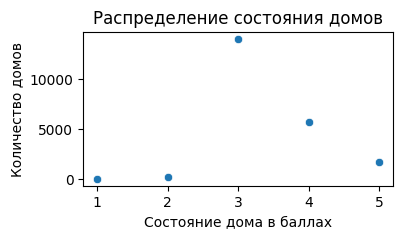

In [17]:
plt.figure(figsize=(4, 2))
sns.scatterplot(x=data3.index,y=data3)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние дома в баллах')
plt.ylabel('Количество домов');

**Вывод:** большинство домов в среднем состоянии (3 балла из 5), домов в плохом состоянии очень мало, в отличном - тоже немного.

**Условие 3: 3 задача**  
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.  

Выясняем, с какими характеристиками коррелирует стоимость недвижимости, с помощью матрицы корреляций:  

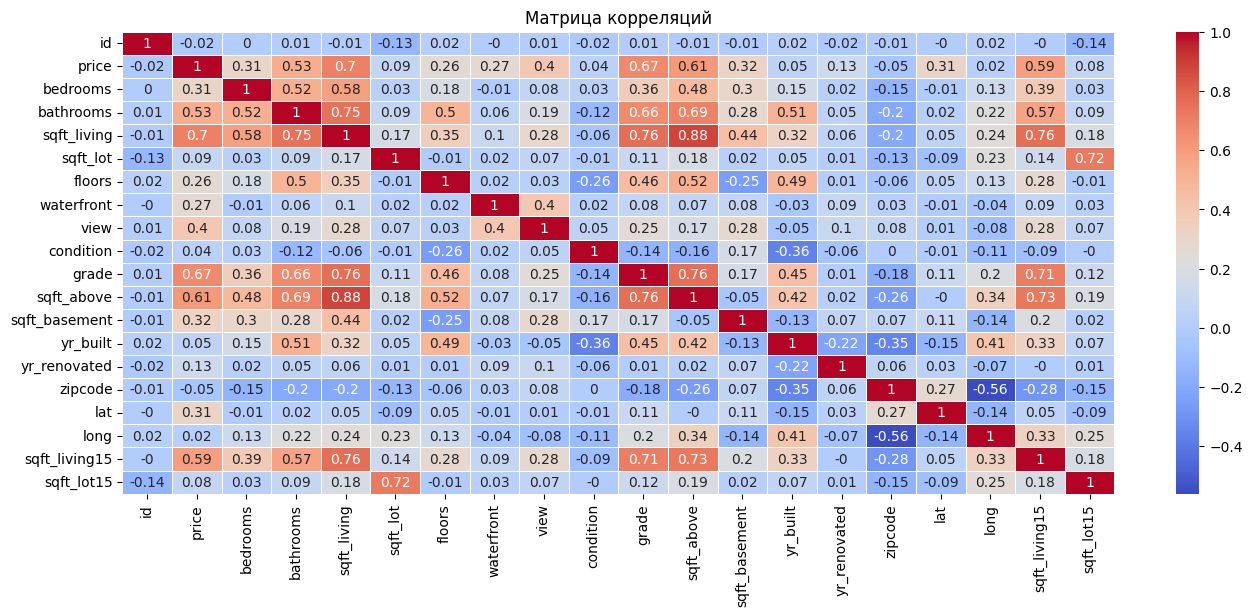

In [18]:
corr_matrix = df.corr(numeric_only=True).round(2)
plt.figure(figsize=(16, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Матрица корреляций');

Видно, что заметно коррелируют с ценой (коэффициент корреляции от 0.5 до 0.7, в порядке убывания): 
  жилая площадь;  
  качество конструкции и дизайна;  
  кол-во кв. метров дома, которые находятся выше земли;  
  кол-во кв. м жилой площади у 15 соседей;  
  кол-во ванных комнат.  
  Умеренно коррелируют с ценой (коэффициент корреляции от 0.3 до 0.5, в порядке убывания):  
  насколько хороший вид;  
  кол-во кв. м дома, которые находятся ниже земли;  
  кол-во спален;  
  широта, на которой расположен дом.

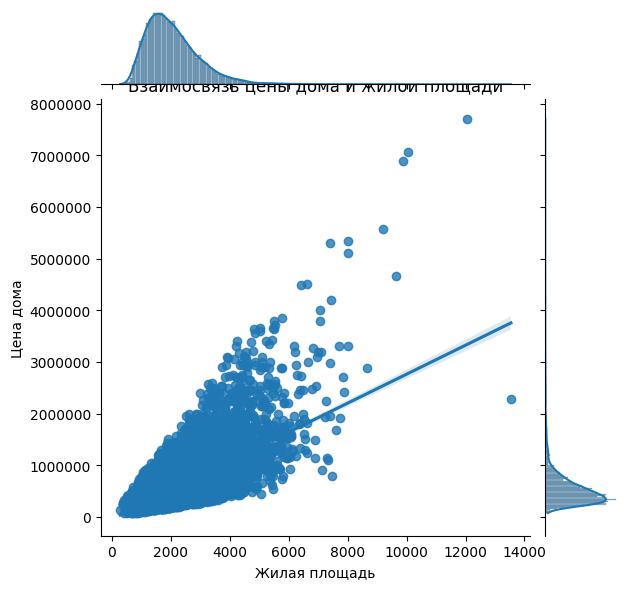

In [19]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg')
plt.ticklabel_format(style='plain')
plt.title('Взаимосвязь цены дома и жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена дома');

График показывает сильную прямую взаимосвязь: чем больше жилая площадь, тем больше цена.

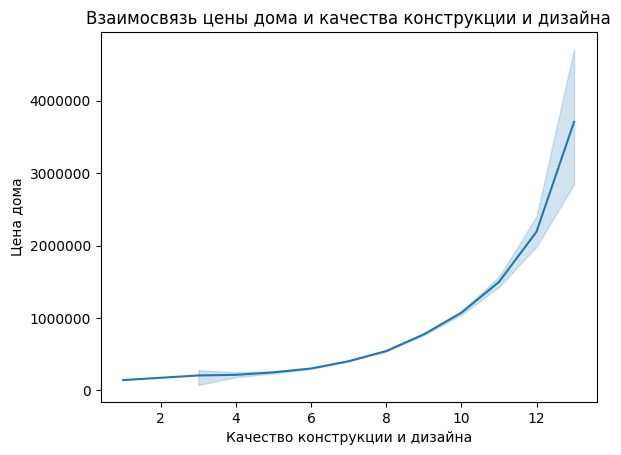

In [20]:
sns.lineplot(x=df['grade'], y=df['price'])
plt.ticklabel_format(style='plain')
plt.title('Взаимосвязь цены дома и качества конструкции и дизайна')
plt.xlabel('Качество конструкции и дизайна')
plt.ylabel('Цена дома');

Видно, что с ростом качества конструкции и дизайна цена дома растет в геометрической прогрессии.

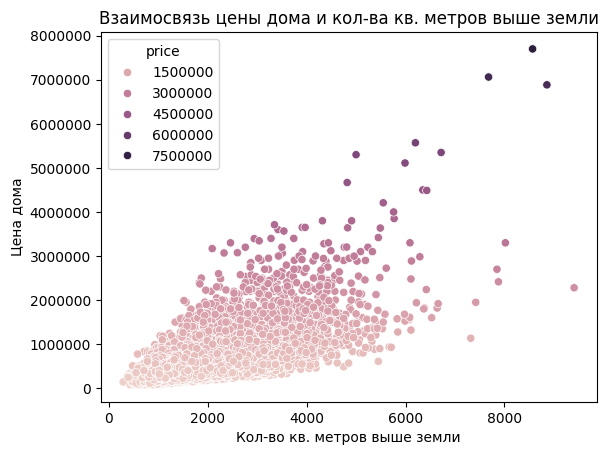

In [21]:
sns.scatterplot(x=df['sqft_above'], y=df['price'], hue=df['price'])
plt.ticklabel_format(style='plain')
plt.title('Взаимосвязь цены дома и кол-ва кв. метров выше земли')
plt.xlabel('Кол-во кв. метров выше земли')
plt.ylabel('Цена дома');

График показывает четкую прямую зависимость: чем больше площадь дома выше земли, тем выше цена.

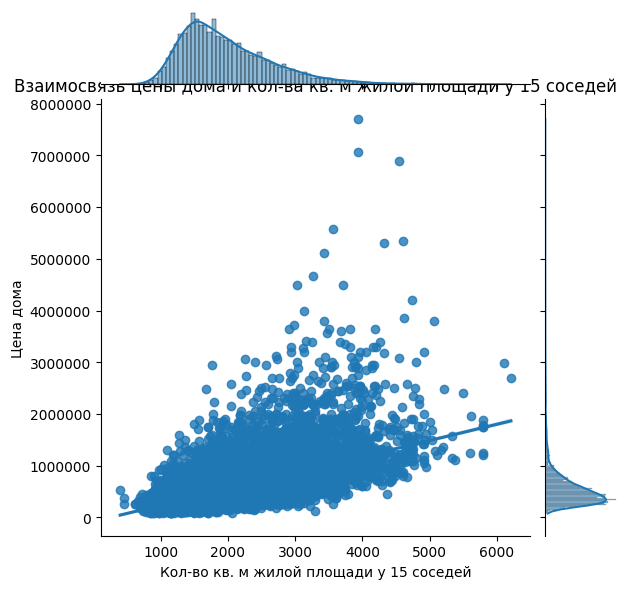

In [22]:
sns.jointplot(x=df['sqft_living15'], y=df['price'], kind='reg')
plt.ticklabel_format(style='plain')
plt.title('Взаимосвязь цены дома и кол-ва кв. м жилой площади у 15 соседей')
plt.xlabel('Кол-во кв. м жилой площади у 15 соседей')
plt.ylabel('Цена дома');

График показывает четкую прямую зависимость: чем больше кол-во кв. м жилой площади у 15 соседей, тем выше цена дома.

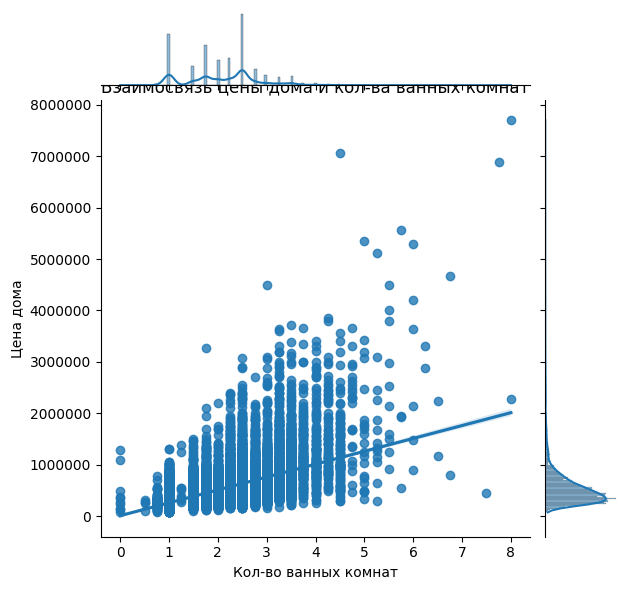

In [23]:
sns.jointplot(x=df['bathrooms'], y=df['price'], kind='reg')
plt.ticklabel_format(style='plain')
plt.title('Взаимосвязь цены дома и кол-ва ванных комнат')
plt.xlabel('Кол-во ванных комнат')
plt.ylabel('Цена дома');

График показывает четкую прямую зависимость: цена дома растет с ростом количества ванных комнат.

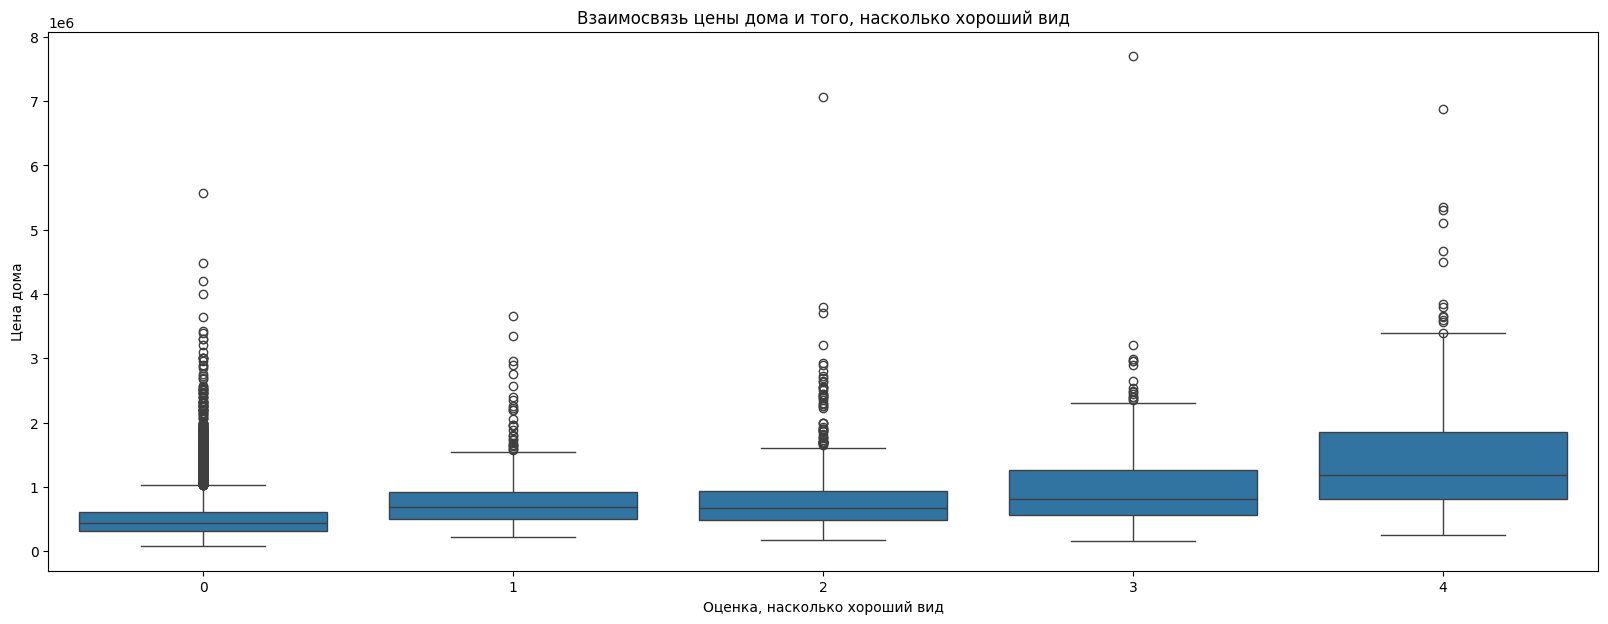

In [24]:
plt.figure(figsize=(20, 7))
sns.boxplot(x=df['view'], y=df['price'])
plt.title('Взаимосвязь цены дома и того, насколько хороший вид')
plt.xlabel('Оценка, насколько хороший вид')
plt.ylabel('Цена дома');

Видно, что средняя стоимость дома тем выше, чем лучше вид (медианы повышаются ступенчато).